# [Visão Computacional](https://denmartins.github.io/teaching/2025-visao-computacional)

## Filtragem Espacial

### [Prof. Dr. Denis Mayr Lima Martins](https://denmartins.github.io/)

### [Pontifícia Universidade Católica de Campinas](https://www.puc-campinas.edu.br/)

<img src="https://www.puc-campinas.edu.br/wp-content/uploads/2022/06/logo-puc.png" width="100px"/>


## Entendendo Convolução

> "**Convolução** é um operador linear que, a partir de duas funções dadas, resulta numa terceira que mede a soma do produto dessas funções ao longo da região subentendida pela superposição delas em função do deslocamento existente entre elas." - [Wikipedia](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o).

### Caso 1D: https://antoinebrl.github.io/blog/conv1d/

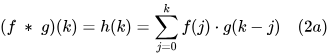

<!-- 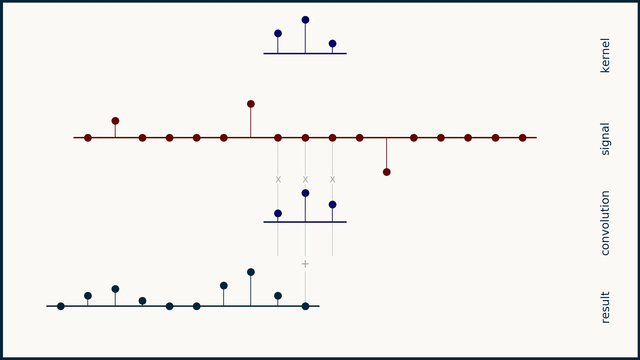!-->
![animação convolução 1D](https://notes.lesleylai.info/assets/discrete_convolution_visualization.gif)


### Caso 2D: https://objetos.github.io/docs/demos/image_conv_vis/

**Kernel**: matriz de pesos $(w_{mn})$.  

$g(x,y) = w(x,y)*f(x,y) = \sum_{s=-a}^{a}\sum_{t=-b}^{b} w(s,t)f(x-s,y-t)$

1. Coloque o centro do kernel sobre o pixel que você está analisando.  
2. Multiplique cada elemento do kernel pelo valor do pixel correspondente na imagem (a região coberta).  
3. Some todos esses produtos para obter um único número, que se torna o novo valor desse pixel na saída.
<center>
    <img src="https://sdsdkkk.github.io/images/posts/2d-convolution.gif" width="300px"/>
</center>


Assim, a convolução é simplesmente "deslizar um pequeno molde de números sobre a imagem e calcular uma soma ponderada" em cada posição, produzindo efeitos variados dependendo do padrão escolhido para o kernel.  

### Propriedades da Convolução

**Comutatividade**

[![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e32bc0c35fdae66282fafef861d719a2fdff9c3)](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o)

**Associatividade**

[![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a2e334496bc382f7a604c31930898333400d2404)](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o)

**Distributividade**

[![](https://wikimedia.org/api/rest_v1/media/math/render/svg/66ccb6c5d02aaadacb39e68625e99e9c0ad5e544)](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o)

**Associatividade com multiplicação escalar**

[![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d5b752b7aa7db6b6238d4f09a7d2055cb8adc528)](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o)

## Imports e Preparação

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

SEED = 1234
np.random.seed(SEED)

In [16]:
def show_images_playground(original, convolved, img_size):
    # Mostra as imagens original o resultado da convolução
    figure, axarr = plt.subplots(1,2, figsize=(6,6))
    axarr[0].imshow(original, cmap= 'gray')
    axarr[1].imshow(convolved, cmap= 'gray')
    for ax in axarr.ravel():
        # Configura major ticks
        ax.set_xticks(np.arange(0, img_size, 1))
        ax.set_yticks(np.arange(0, img_size, 1))
        # Configura minor ticks
        ax.set_xticks(np.arange(-.5, img_size, 1), minor=True)
        ax.set_yticks(np.arange(-.5, img_size, 1), minor=True)
        # Configura gridlines baseadas nos minor ticks
        ax.grid(which='minor', color='b', linestyle='-', linewidth=2)
        # Remove minor ticks
        ax.tick_params(which='minor', bottom=False, left=False)
    plt.show()

def show_images(original, convolved):
    figure, axarr = plt.subplots(1,2, figsize=(10,10))
    axarr[0].imshow(original, cmap= 'gray')
    axarr[1].imshow(convolved, cmap= 'gray')
    
    # Remove plt grid e ticks
    for ax in axarr.ravel():
        ax.set_axis_off()
    
    plt.show()

## Playground: Testando filtros imagem binária

In [17]:
# Cria imagem aletória
img_size = 16
rnd_img = np.random.randint(0, 2, size=(img_size,img_size),dtype=np.uint8)

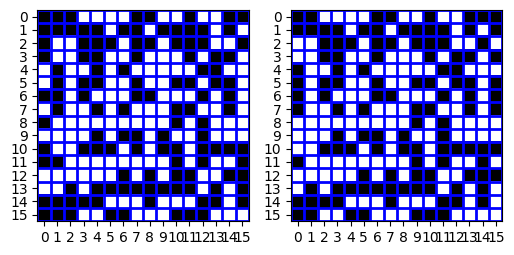

In [19]:
kernel = np.array( # Define um kernel
    [[0, 0, 0],
     [0, 0, 1],
     [0, 0, 0]],
    np.float32)
resultado_img = cv2.filter2D(rnd_img, -1, kernel) # Convolução
show_images_playground(rnd_img, resultado_img, img_size)

## Carregamento de Imagem

In [22]:
def url_to_image(url, readFlag=cv2.IMREAD_GRAYSCALE):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)
    # return the image
    return image

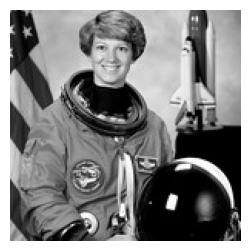

In [23]:
img = url_to_image("https://www.flickr.com/photo_download.gne?id=16504233985&secret=9f1060624e&size=q&source=photoPageEngagement")
plt.figure(figsize=(3,3))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

## Filtro de Média

Utilizado para **suavização** da imagem.

**Diminui a nitidez** pela redução de fortes transições de intensidade entre os pixels.

<img src="https://pic3.zhimg.com/v2-735cda50ca616740c4b14b6b82d42bc2_r.jpg" width="600px"/>


### Filtro de Média: Aplicação

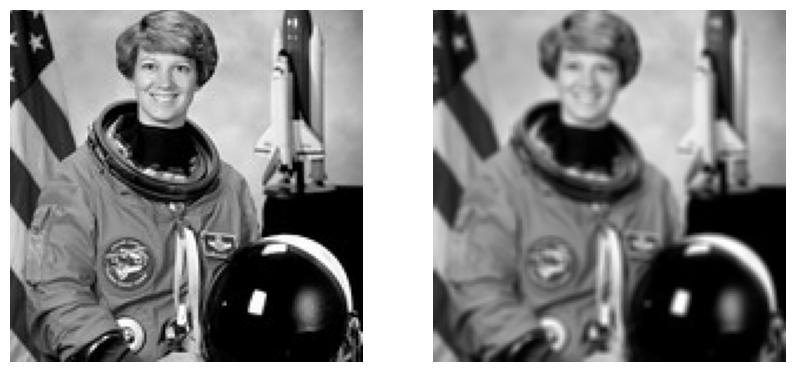

In [6]:
# Define um kernel de suavização (média)
kernel = np.ones((3,3), np.float32) / 9

# Aplica a convolução com o kernel
media_img = cv2.filter2D(img, -1, kernel)

# Mostra as imagens original e suavizada
show_images(img, media_img)

### Filtro de Média: Kernels de diferentes tamanhos

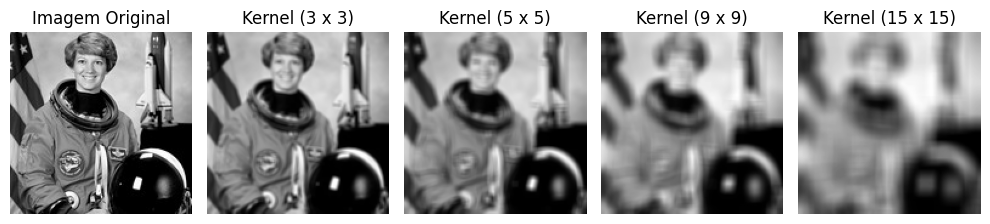

In [28]:
# Cria a estrutura de plots para as imagens
figure, axarr = plt.subplots(1,5, figsize=(10,10))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
for cnt, size in enumerate([3, 5, 9, 15]):
  # Define um kernel de suavização (média)
  kernel = np.ones((size,size), np.float32) / (size**2)
  # Aplica a convolução com o kernel
  imagem_suavizada = cv2.filter2D(img, -1, kernel)
  # Mostra as imagens original e suavizada
  axarr[cnt+1].imshow(imagem_suavizada, cmap= 'gray')
  axarr[cnt+1].set_title(f"Kernel ({size} x {size})")
# Remove plt grid e ticks
for ax in axarr.ravel():
    ax.set_axis_off()
plt.tight_layout()
plt.show()

### Filtro de Média: Diferentes valores de Kernel

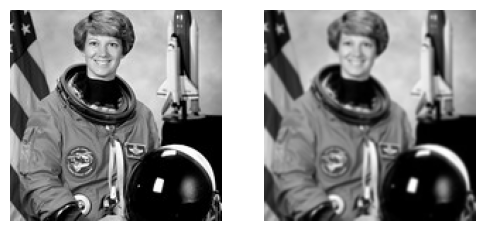

In [31]:
kernel_media = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]).astype(np.float16)
kernel_media /= kernel_media.sum()
imagem_suavizada = cv2.filter2D(img, -1, kernel_media)
figure, axarr = plt.subplots(1,2, figsize=(6,6))
axarr[0].imshow(img, cmap= 'gray')
axarr[1].imshow(imagem_suavizada, cmap= 'gray')
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

## Filtro Gaussiano

**Suavização**: Filtro de média ponderada, mas com seus pesos seguindo uma aproximação da **distribuição gaussiana**.

$G(x,y;\sigma)=\frac{1}{2\pi\sigma^{2}}\exp\!\left(-\,\frac{x^{2}+y^{2}}{2\sigma^{2}}\right)$

Note que o valor resultante para o elemento central pode ser um valor não existente na imagem original.

<img src="https://miro.medium.com/v2/resize:fit:875/1*Nf8jVYj2zhPPOjJSQrY9Ug.png" width="300"/><img src="https://miro.medium.com/v2/resize:fit:1250/1*Ra4DG6PT0hxnvH2aW2OUKw.gif" width="300"/>

Fonte da Imagem: [Towards AI](https://towardsai.net/p/machine-learning/gaussian-blurring-a-gentle-introduction).


### Filtro Gaussiano: Aplicação

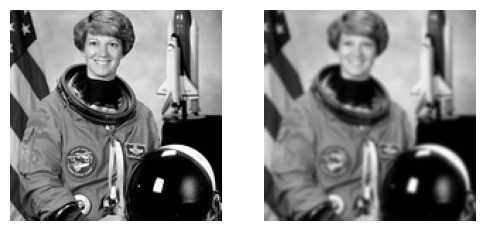

In [32]:
# Suavização Gaussiana (Filtro Gaussiano)
kernel_size = (5, 5)
sigma = 1.0
# Aplica o filtro Gaussiano
blurred = cv2.GaussianBlur(img, kernel_size, sigmaX=sigma)
figure, axarr = plt.subplots(1,2, figsize=(6,6))
axarr[0].imshow(img, cmap= 'gray')
axarr[1].imshow(blurred, cmap= 'gray')
# Remove plt grid e ticks
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

### Filtro Gaussiano: Testando diferentes valores de $\sigma$

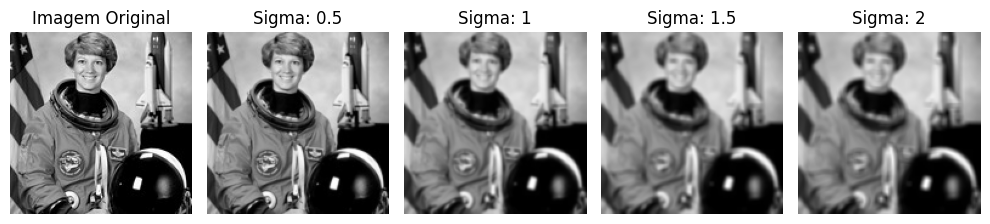

In [33]:
# Cria a estrutura de plots para as imagens
figure, axarr = plt.subplots(1,5, figsize=(10,5))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
for cnt, sigma in enumerate([0.5, 1, 1.5, 2]):
  # Aplica o filtro Gaussiano
  gauss_img = cv2.GaussianBlur(img, kernel_size, sigmaX=sigma)
  # Mostra as imagens original e suavizada
  axarr[cnt+1].imshow(gauss_img, cmap= 'gray')
  axarr[cnt+1].set_title(f"Sigma: {sigma}")
  ax.set_axis_off()
# Remove plt grid e ticks
for ax in axarr.ravel():
    ax.set_axis_off()
plt.tight_layout()
plt.show()

### Comparação: Filtro de Média versus Filtro Gaussiano

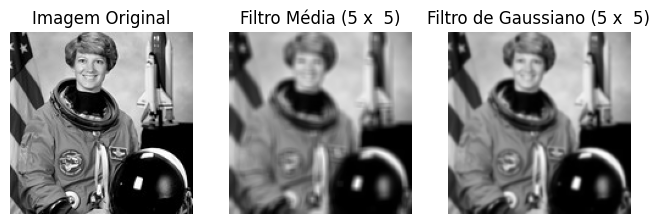

In [55]:
kernel_size = (5, 5)
avg_img = cv2.blur(img, kernel_size)
gaussian_img = cv2.GaussianBlur(img, kernel_size, sigmaX=1.0)
figure, axarr = plt.subplots(1,3, figsize=(8,8))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
axarr[1].imshow(avg_img, cmap= 'gray')
axarr[1].set_title(f"Filtro Média {str(kernel_size).replace(',', ' x ')}")
axarr[2].imshow(gaussian_img, cmap= 'gray')
axarr[2].set_title(f"Filtro de Gaussiano {str(kernel_size).replace(',', ' x ')}")
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

# Filtro Mediana

* Elimina **picos isolados** (outliers).
* Substitui o valor de um pixel pela **mediana** dos valores de intensidade na vizinhança desse pixel.

<img src="https://www.researchgate.net/publication/281499535/figure/fig17/AS:614347470540833@1523483259905/Concept-of-median-filtering-in-image-processing.png" width="400px"/>

Fonte da Imagem: [ResearchGate](https://www.researchgate.net/figure/Concept-of-median-filtering-in-image-processing_fig17_281499535).

### Filtro Mediana: Aplicação

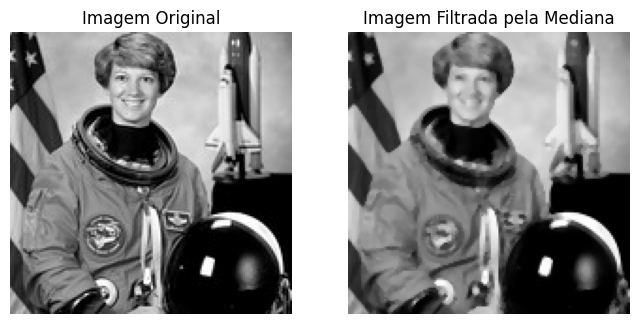

In [56]:
# Aplica filtro de mediana
median_filtered = cv2.medianBlur(img, ksize=3)
figure, axarr = plt.subplots(1,2, figsize=(8,8))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
axarr[1].imshow(median_filtered, cmap= 'gray')
axarr[1].set_title("Imagem Filtrada pela Mediana")
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

### Filtro de Mediana: Removendo Ruído Salt-and-Pepper

In [58]:
def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w = noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)
    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = 0
        else:
            noisy_image[row, col] = 255
    return noisy_image
    
ruido_img = add_salt_and_pepper_noise(img)

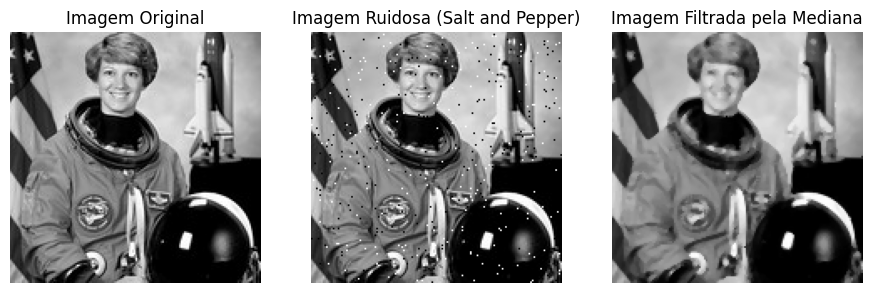

In [62]:
mediana_filtrada_img = cv2.medianBlur(ruido_img, ksize=3)
figure, axarr = plt.subplots(1,3, figsize=(11,8))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
axarr[1].imshow(ruido_img, cmap= 'gray')
axarr[1].set_title("Imagem Ruidosa (Salt and Pepper)")
axarr[2].imshow(mediana_filtrada_img, cmap= 'gray')
axarr[2].set_title("Imagem Filtrada pela Mediana")
# Remove plt grid e ticks
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

## Filtro Sobel

* O filtro de Sobel é um operador discreto de derivação, projetado para estimar a magnitude do gradiente de intensidade em imagens digitais. $\rightarrow$ Combina duas convoluções separadas: uma kernel $h_x$ que responde à variação horizontal e outra $h_y$ que captura a variação vertical. 
* A combinação das respostas $\sqrt{(I * h_x)^2 + (I * h_y)^2}$ fornece uma aproximação robusta da magnitude do gradiente, enquanto o sinal de cada componente indica a direção local do aumento ou diminuição de intensidade. 
* Eficaz na detecção de bordas: Enfatiza regiões com transições rápidas de luminância. Suaviza ruídos graças à integração de ponderações gaussiana-like nos kernels.


<div style='align: left; text-align:center;'>
    <img src='https://blog.paperspace.com/content/images/2022/06/sobel.png' alt='Espectro Eletromagnético' style="width:330px;"/>
    <span style='display:block;'>Filtro Sobel. Fonte: <a href="https://www.digitalocean.com/community/tutorials/filters-in-convolutional-neural-networks" target="_blank">Digital Ocean</a>.</span>
    <br/>
</div>

### Filtro Sobel: Exemplo

<div style='align: left; text-align:center;'>
    <img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*G5_NQk-1X4rNExvJCQ3T1A.gif' alt='Espectro Eletromagnético' style="width:600px;"/>
    <span style='display:block;'>Exemplo de aplicação de Filtro Sobel. Fonte: <a href="https://medium.com/turing-talks/detec%C3%A7%C3%A3o-de-bordas-e-transforma%C3%A7%C3%B5es-morfol%C3%B3gicas-em-imagens-com-opencv-8aecf8c8ba2f" target="_blank">Luísa Mendes Heise @Turing Talks</a>.</span>
    <br/>
</div>

### Filtro Sobel: Aplicação

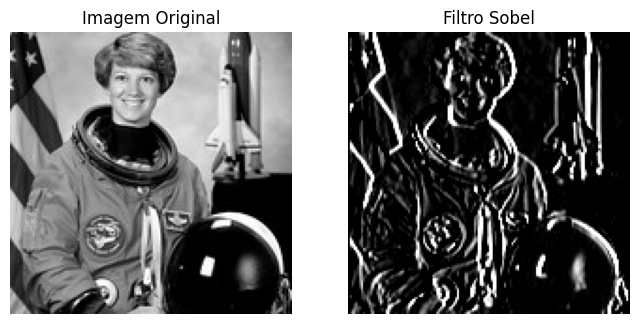

In [66]:
sobel_img = cv2.Sobel(img, ddepth=-1, dx=1, dy=0, ksize=3)

figure, axarr = plt.subplots(1,2, figsize=(8,8))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
axarr[1].imshow(sobel_img, cmap= 'gray')
axarr[1].set_title("Filtro Sobel")
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

## Filtro Laplaciano

* O operador laplaciano é uma segunda derivada discreta que mede a divergência do gradiente de intensidade de uma imagem.
* $Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}}$
* Captura a divergência do gradiente de intensidade de uma imagem, ou seja, quantifica as regiões onde a curvatura da luminância muda drasticamente.
* Soma ponderada dos vizinhos diretos do pixel central, subtraindo quatro vezes seu valor.
* Destaca pontos de mudança abrupta — bordas e cantos — mas não indica a direção dessas transições.
* Kernels laplacianos geralmente incluem valores negativos na vizinhança e um valor igual à soma destes valores negativos no centro, mas
com sinal invertido:
$$K = \begin{bmatrix}0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix}$$

### Filtro Laplaciano: Aplicação

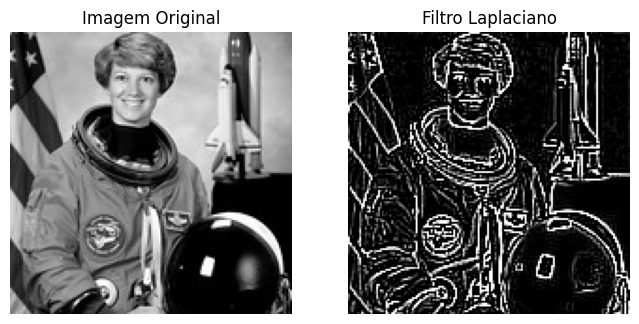

In [65]:
laplacean_img = cv2.Laplacian(img, ddepth=-1, ksize=3)

figure, axarr = plt.subplots(1,2, figsize=(8,8))
axarr[0].imshow(img, cmap= 'gray')
axarr[0].set_title("Imagem Original")
axarr[1].imshow(laplacean_img, cmap= 'gray')
axarr[1].set_title("Filtro Laplaciano")
for ax in axarr.ravel():
    ax.set_axis_off()
plt.show()

## Outros Filtros

**Prewitt**

- Operador linear de 3×3 usado para detecção de bordas.
- Calcula aproximações das derivadas parciais ∂I/∂x e ∂I/∂y.  
  $$
  G_x=\begin{bmatrix}-1&0&1\\-1&0&1\\-1&0&1\end{bmatrix},\quad
  G_y=\begin{bmatrix}-1&-1&-1\\0&0&0\\1&1&1\end{bmatrix}
  $$
- Resultado: imagem com bordas destacadas; suaviza ruído moderado, porém menos sensível que Sobel.

## Outros Filtros (cont.)

**Max (Filtro de Maxima)**

- Operador não linear que substitui cada pixel pelo maior valor dentro do vizinho definido.
- Reduz ruído impulsivo “salt & pepper”, preservando detalhes mais claros.  
- Resultado: imagem com regiões saturadas ampliadas; pode gerar bordas suavizadas em áreas escuras.

**Min (Filtro de Minima)**

- Operador não linear que substitui cada pixel pelo menor valor dentro do vizinho.
- Útil para eliminar ruído impulsivo salt and pepper nas áreas claras.  
- Resultado: diminuição de brilho local, bordas mais suaves em regiões escuras.

## Resumo

---

<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:55%;">

- **Convolução**: ferramenta matemática central.  
- **Filtros lineares** (média, Gaussiano) oferecem suavização controlada; a separabilidade do kernel pode reduzir drasticamente o custo computacional.  
- **Filtros não‑lineares** (mediana, adaptativos) são essenciais para robustez contra ruído impulsivo e preservação de bordas em cenários adversos.  
- A escolha entre **suavização** e **realce** depende da aplicação: imagens médicas, visão robótica ou processamento de vídeo em tempo real.  

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:45%;">
<img src="https://staticbv.bvirtual.com.br/publicacoes/2608/thumbs/thumbnail_397_x_595.jpg" width="200px">
<p><b>Leitura Recomendada</b>: Seções 3.4 a 3.7.</p>
</td>
</tr>
</table>